In [3]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Vector Data Example

In [23]:
# 1. Create dummy vector geometries
point = Point(36.8219, -1.2921)  # e.g. Nairobi
line = LineString([(36.82, -1.29), (36.83, -1.30), (36.84, -1.31)])  # a road
polygon = Polygon([(36.80, -1.28), (36.85, -1.28), (36.85, -1.33), (36.80, -1.33)])  # an area (like a park)

In [24]:
# 2. Create GeoDataFrames
gdf_points = gpd.GeoDataFrame({'name': ['Nairobi']}, geometry=[point])
gdf_lines = gpd.GeoDataFrame({'name': ['Sample Road']}, geometry=[line])
gdf_polygons = gpd.GeoDataFrame({'name': ['Sample Park']}, geometry=[polygon])

In [25]:
gdf_polygons

,name,geometry
0,Sample Park,"POLYGON ((36.8 -1.28, 36.85 -1.28, 36.85 -1.33..."


In [26]:
gdf_lines

,name,geometry
0,Sample Road,"LINESTRING (36.82 -1.29, 36.83 -1.3, 36.84 -1.31)"


In [27]:
gdf_points

,name,geometry
0,Nairobi,POINT (36.8219 -1.2921)


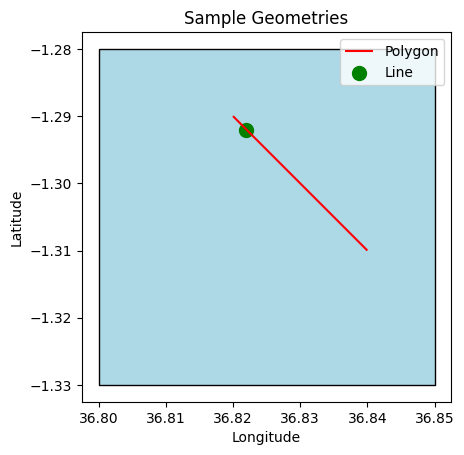

In [28]:
# Plotting the geometries
fig, ax = plt.subplots()
gdf_polygons.plot(ax=ax, color='lightblue', edgecolor='black')
gdf_lines.plot(ax=ax, color='red')
gdf_points.plot(ax=ax, color='green', markersize=100)
plt.title('Sample Geometries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['Polygon', 'Line', 'Point'])
plt.show()

### Raster Data Example

In [29]:
# 1. Create a dummy 2D array (10x10 grid)
raster = np.random.rand(10, 10) * 100  # values between 0 and 100 (e.g., temperature or elevation)

In [30]:
raster

array([[82.72370857, 15.78393411, 98.17389955, 63.69968235, 12.81514842,
        66.25143245, 26.97216756, 57.80240292, 40.05460968, 69.57751012],
       [94.58476486, 55.40209246, 75.6665301 , 66.4282648 , 96.93717999,
        46.55906709, 38.86959912, 99.87666183, 44.76891649, 94.87071418],
       [28.31581515, 40.05624347,  9.21931536, 80.04362577,  2.02193328,
        74.00404154, 12.08958418, 72.12762872,  9.05500411, 87.91999315],
       [76.66000534, 13.29900166, 80.24766109,  5.87522042, 36.04311835,
        66.69584641, 75.94768443, 74.14074185, 91.89166395, 50.8401503 ],
       [74.52331495, 80.59904314, 31.57044793, 36.40041598, 39.34705887,
        47.00897313, 95.05033553, 21.25990575, 88.6244921 , 31.95146425],
       [43.48849129, 50.52854067, 14.31301063, 80.97412984,  8.26646746,
        49.8883797 , 96.15954776, 89.76131505,  3.71599818, 51.28749202],
       [95.72093769, 92.07469449, 61.68918482, 56.21909752, 37.94549466,
        73.05087157, 47.1465945 , 51.02219352

In [31]:
raster.shape

(10, 10)

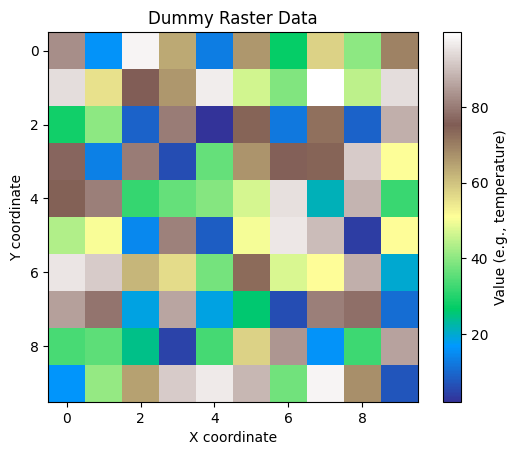

In [36]:
# Plotting the raster data
plt.imshow(raster, cmap='terrain', origin='upper', interpolation='nearest')
plt.colorbar(label='Value (e.g., temperature)')
plt.title('Dummy Raster Data')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

### Convert Raster Grid to Vector Points

In [37]:
rows, cols = raster.shape
points = []
values = []

In [39]:
raster.shape

(10, 10)

In [40]:
for i in range(rows):
    for j in range(cols):
        points.append(Point(j, i))  # (x, y) coordinates
        values.append(raster[i, j])  # raster value
# Create a DataFrame from the points and values
gdf_raster_points = gpd.GeoDataFrame({'value': values}, geometry=points)
gdf_raster_points.head()

,value,geometry
0,82.723709,POINT (0 0)
1,15.783934,POINT (1 0)
2,98.173900,POINT (2 0)
3,63.699682,POINT (3 0)
4,12.815148,POINT (4 0)


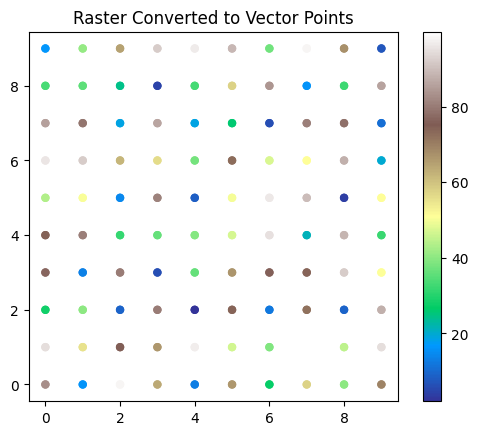

In [42]:
# Plotting the raster data with points
gdf_raster_points.plot(column='value', cmap='terrain', legend=True, markersize=25)
plt.title("Raster Converted to Vector Points")
plt.show()